In [2]:
import aioboto3

ENDPOINT_URL = 'http://172.18.0.4:9000'
ACCESS_KEY = 'fcEPzXwRe9tAtUIjco0o'
SECRET_KEY = 'Y85wp1asb1EwZsXhfCz73kWhuQYoO4le6dhXqRhO'
BUCKET_NAME = 'animals'
VERSION='s3v4'

In [3]:
class S3Client:
    def __init__(self, endpoint_url = ENDPOINT_URL, access_key = ACCESS_KEY, secret_key=SECRET_KEY, bucket_name=BUCKET_NAME, version='s3v4'):
        self.endpoint_url = endpoint_url
        self.access_key = access_key
        self.secret_key = secret_key
        self.bucket_name = bucket_name
        self.version = version
        self.session = aioboto3.Session(region_name='public-read')
        self.client = None
        
    async def create_bucket(self, bucket_name, region=None):
        """Создает бакет в S3 с указанным именем и регионом"""
        async with self.session.client("s3", endpoint_url=ENDPOINT_URL,aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY, region_name='public-read') as s3:
            await s3.create_bucket(Bucket=bucket_name)
            print(f'Бакет {bucket_name} успешно создан.')


    async def upload_file(self, file, filename: str):
        async with self.session.client("s3", endpoint_url=ENDPOINT_URL,aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY, region_name='public-read') as s3:
            await s3.upload_fileobj(file, self.bucket_name, filename)

    async def download_file(self, filename: str):
        s3_file: dict = {}
        async with self.session.resource("s3", endpoint_url=ENDPOINT_URL,aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY, region_name='public-read') as s3:
            bucket = await s3.Bucket(BUCKET_NAME)
            obj = await s3.Object(self.bucket_name, key=filename)
            s3_file = await obj.get()
            data = await s3_file['Body'].read()
            return data
        
        
            # async with aiofiles.open('local_filename', 'wb') as file:
            #     await file.write(data)
            
s3 = S3Client()

In [14]:
await s3.create_bucket(BUCKET_NAME)

BucketAlreadyOwnedByYou: An error occurred (BucketAlreadyOwnedByYou) when calling the CreateBucket operation: Your previous request to create the named bucket succeeded and you already own it.

In [6]:
import zipfile
import io

In [10]:
session = aioboto3.Session(region_name='public-read')

In [11]:
data = await s3.download_file("127047ee-cfa2-43c0-a2ed-a42c308d51b8")

In [12]:
zf = zipfile.ZipFile(io.BytesIO(data), "r")
with zf as archive:
    print(archive.namelist())

['cameratrap/enot01.jpg', 'cameratrap/kaban01.jpg', 'cameratrap/los02.jpg', 'cameratrap/volk01.jpg']


In [14]:
from typing import ClassVar

In [6]:
res = []

In [7]:
res == []

True

In [15]:
class_mapping: ClassVar[dict[int, str]] = {
        i: name
        for i, name in enumerate(
            [
                'Badger',
                'Bear',
                'Bison',
                'Cat',
                'Dog',
                'Fox',
                'Goral',
                'Hare',
                'Lynx',
                'Marten',
                'Moose',
                'Mountain_Goat',
                'Musk_Deer',
                'Racoon_Dog',
                'Red_Deer',
                'Roe_Deer',
                'Snow_Leopard',
                'Squirrel',
                'Tiger',
                'Wolf',
                'Wolverine',
                'Empty'
            ]
        )
    }

In [16]:
class_mapping

{0: 'Badger',
 1: 'Bear',
 2: 'Bison',
 3: 'Cat',
 4: 'Dog',
 5: 'Fox',
 6: 'Goral',
 7: 'Hare',
 8: 'Lynx',
 9: 'Marten',
 10: 'Moose',
 11: 'Mountain_Goat',
 12: 'Musk_Deer',
 13: 'Racoon_Dog',
 14: 'Red_Deer',
 15: 'Roe_Deer',
 16: 'Snow_Leopard',
 17: 'Squirrel',
 18: 'Tiger',
 19: 'Wolf',
 20: 'Wolverine',
 21: 'Empty'}

In [8]:
from ultralytics import YOLO

In [ ]:
s3_write = S3Client(bucket_name="results")

In [7]:
import datetime
 
date = datetime.datetime

In [5]:
from typing import ClassVar

In [6]:
class_mapping: ClassVar[dict[int, str]] = {
        i: name
        for i, name in enumerate(
            [
                'animal',
                'person',
                'vehicle'
            ]
        )
    }

In [117]:
class_mapping

{0: 'animal', 1: 'person', 2: 'vehicle'}

In [27]:
import zipfile
import io
from PIL import Image, ExifTags
import cv2
from io import BytesIO, BufferedReader 

zf = zipfile.ZipFile(io.BytesIO(data), "r")
type(zf)
#yl = YOLO(model='deepfaune-yolov8s_960.pt')

img = None
result_dict = {}
with zf as archive:
    for image in archive.namelist():
        result = []
        # Открыть изображение
        f = archive.open(image)
        # Конвертация изображения
        img = Image.open(f)
        # Сбор метаданных
        # exif = { ExifTags.TAGS[k]: v for k, v in img._getexif().items() if k in ExifTags.TAGS }
        # # Предикт
        # res = yl.predict(source=img)
        # # Формирование ответа
        # for i in res[0].boxes.data.cpu().tolist():
        #     res_dict = {
        #         'x1':int(i[0]),
        #         'y1':int(i[1]),
        #         'x2':int(i[2]),
        #         'y2':int(i[3]), 
        #         'conf': i[4],
        #         'class': class_mapping[int(i[5])]
        #     }
        #     result.append(res_dict)
        # result_dict[image] = {'orig_image':res[0].plot().tolist(),"im_datetime":exif['DateTime'],'data':result}
        # # Плотинг ббокса
        # import numpy as np
        # _, buffer = cv2.imencode('.jpg', res[0].plot())
        break
        # Перевод в iobf
        # iobf = BufferedReader(BytesIO(buffer.tobytes()))
        #         # Сохранение в s3
        # await s3_write.upload_file(iobf,image)

# File Name                                             Modified             Size
# traps/1/IMG_0004.JPG                                 2024-07-06 21:24:34       429125
# 1/IMG_0005.JPG                                 2024-07-06 21:24:34       408930
# 1/IMG_0006.JPG                                 2024-07-06 21:24:34       415612

"""{
    '1/IMG_0004.JPG':{
        "orig_image": list,
        "im_datetime": дата,
        'data': [
            {'x1': 1334,
            'y1': 360,
            'x2': 2048,
            'y2': 1175,
            'conf': 0.9548520445823669,
            'class': 'animal'
            },
            {'x1': 1334,
            'y1': 360,
            'x2': 2048,
            'y2': 1175,
            'conf': 0.9548520445823669,
            'class': 'animal'
            }
        ]
    }   
}"""

In [30]:
import cv2
import numpy as np

In [32]:
np.array(img)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

: 

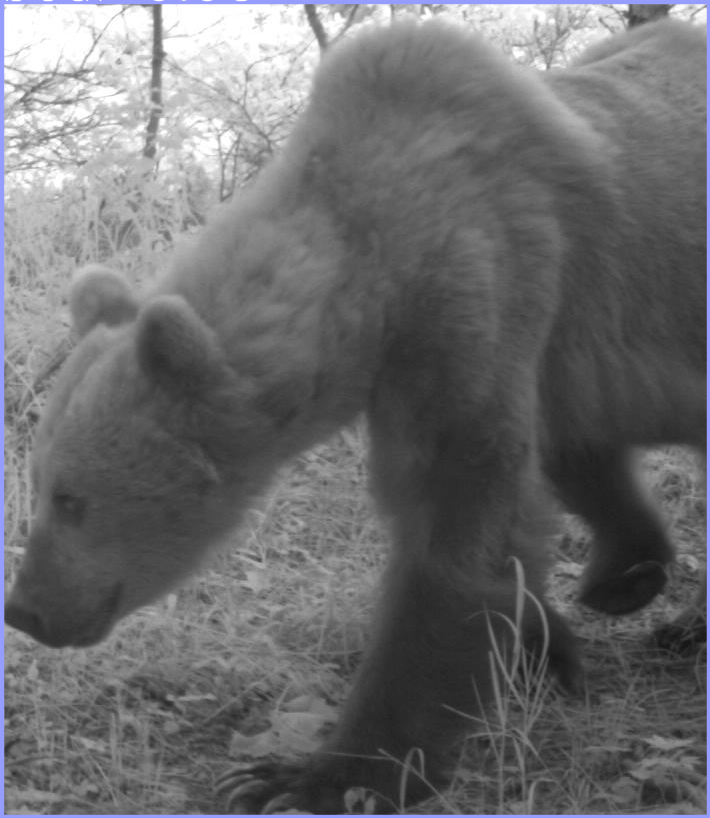

In [108]:
Image.fromarray(res[0].plot()[res_dict['y1']:res_dict['y2'],res_dict['x1']:res_dict['x2']])

In [99]:
buffer

array([255, 216, 255, ...,  31, 255, 217], dtype=uint8)

In [92]:
res[0].boxes.data.cpu().tolist()

[[1336.479736328125,
  351.85345458984375,
  2046.3485107421875,
  1169.52587890625,
  0.9463861584663391,
  21.0]]

In [88]:
exif['DateTime']

'2020:07:22 07:02:52'

In [78]:
res_exif.has_exif

False

In [66]:
import exif

In [ ]:
exif

In [65]:
len(res)

187

In [59]:
type(buffer)

numpy.ndarray

In [43]:
ret, buffer = cv2.imencode('.jpg', res[0].plot())

In [48]:
from io import BytesIO, BufferedReader 

In [50]:
	#Convert array to binary type
#Convert to _io.BytesIO type
f5 = BufferedReader(BytesIO(buffer.tobytes()))	

In [37]:
s3_write = S3Client(bucket_name="results")

In [52]:
#import asyncio
await s3_write.upload_file(f5,"1/IMG_0004.JPG")

In [20]:
from io import BytesIO
from PIL import Image

In [21]:
img = Image.open(BytesIO(data))

NameError: name 'data' is not defined

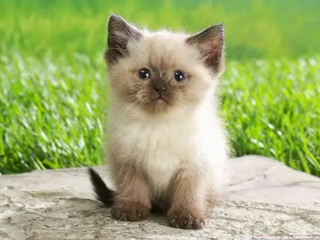

In [88]:
img

In [40]:
fl = open("/home/hack/l_8744d668 (1).jpg","rb")

In [41]:
type(fl)

_io.BufferedReader

In [23]:
async with session.client("s3", endpoint_url=ENDPOINT_URL,aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY, region_name='public-read') as s3:
    await s3.upload_fileobj(fl, "animals", "first/l_8744d668.jpg")